In [1]:
import sys
sys.path.append("../")
from IPython.display import display, Math
import os
import scipy as sci
import numpy as np
import matrix_handler as mx

zadania = "zadania"

### Dopasowanie danych do modelu:
$$ f(x) = a_0 + a_1 x$$

#### Rozwiązanie z wykorzystaniem metod wbudowanych

In [2]:
A = np.loadtxt(os.path.join(zadania, "zad4A.txt"), float, delimiter=" ", ndmin=2)
b = np.loadtxt(os.path.join(zadania, "zad4_b.txt"), float, delimiter=" ", ndmin=2)

x, _, _, _ = sci.linalg.lstsq(A, b)
display(Math("A^T ="))
mx.print_matrix(A.T)
display(Math("b^T = "))
mx.print_matrix(b.T)
display(Math("x^T = "))
mx.print_matrix(x.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Rozwiązanie z wykorzystaniem zaimplementowanych funkcji

In [3]:
from solvers import least_square

x = least_square(A, b)
display(Math("x^T = "))
mx.print_matrix(x.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Porównanie otrzymanej funkcji do wartości rzeczywistych.

In [4]:
samplesLen = len(b)
coefsNum = len(x)
y = []
for i in range(samplesLen):
    y.append(A[i][0]*x[0] + A[i][1]*x[1])
    print("f(", A[i][1] , ") = ", float(b[i]), " vs ", float(y[i]))

f( -5.0 ) =  2.0  vs  8.727272727272727
f( -4.0 ) =  7.0  vs  8.90909090909091
f( -3.0 ) =  9.0  vs  9.090909090909092
f( -2.0 ) =  12.0  vs  9.272727272727273
f( -1.0 ) =  13.0  vs  9.454545454545455
f( 0.0 ) =  14.0  vs  9.636363636363637
f( 1.0 ) =  14.0  vs  9.818181818181818
f( 2.0 ) =  13.0  vs  10.0
f( 3.0 ) =  10.0  vs  10.181818181818182
f( 4.0 ) =  8.0  vs  10.363636363636363
f( 5.0 ) =  4.0  vs  10.545454545454547


Wizualizacja dopasowania modelu do wartości rzeczywistych

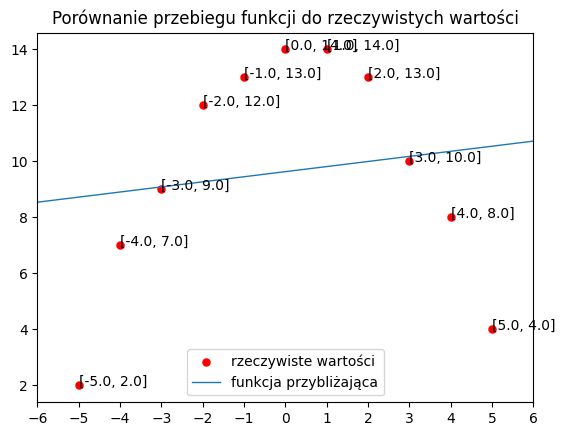

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(A[:, 1], b, linewidths=.1, c="red", label="rzeczywiste wartości")

xPlot = np.arange(-6, 8, step=1)
yPlot = x[0] + x[1]*xPlot
ax.plot(xPlot, yPlot, linewidth=1, label="funkcja przybliżająca")

for i in range(len(b)):
    ax.text(A[i][1], b[i], s=fr"[{float(A[i][1])}, {float(b[i])}]")

ax.set(xlim=(-6, 6), xticks=np.arange(-6, 7, step=1))
plt.title("Porównanie przebiegu funkcji do rzeczywistych wartości")
plt.legend(loc="lower center")
plt.show()

Możemy zauważyć, że model funkcji pierwszego rzędu nie pasuje do danych.

### Dopasowanie danych do modelu:
$$ f(x) = a_0 + a_1 x + a_2 x^2$$

#### Rozwiązanie z wykorzystaniem metod wbudowanych

In [6]:
A = np.loadtxt(os.path.join(zadania, "zad4B.txt"), float, delimiter=" ", ndmin=2)
b = np.loadtxt(os.path.join(zadania, "zad4_b.txt"), float, delimiter=" ", ndmin=2)

x, _, _, _ = sci.linalg.lstsq(A, b)
display(Math("A^T ="))
mx.print_matrix(A.T)
display(Math("b^T = "))
mx.print_matrix(b.T)
display(Math("x^T = "))
mx.print_matrix(x.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Rozwiązanie z wykorzystaniem zaimplementowanych funkcji

In [7]:
x = least_square(A, b)
display(Math("x^T = "))
mx.print_matrix(x.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Porównanie otrzymanej funkcji do wartości rzeczywistych.

In [8]:
samplesLen = len(b)
coefsNum = len(x)
y = []
for i in range(samplesLen):
    y.append(A[i][0]*x[0] + A[i][1]*x[1] + A[i][2]*x[2])
    print("f(", A[i][1] , ") = ", float(b[i]), " vs ", float(y[i]))

f( -5.0 ) =  2.0  vs  2.2237762237762198
f( -4.0 ) =  7.0  vs  6.307692307692305
f( -3.0 ) =  9.0  vs  9.524475524475523
f( -2.0 ) =  12.0  vs  11.874125874125873
f( -1.0 ) =  13.0  vs  13.356643356643357
f( 0.0 ) =  14.0  vs  13.972027972027972
f( 1.0 ) =  14.0  vs  13.72027972027972
f( 2.0 ) =  13.0  vs  12.6013986013986
f( 3.0 ) =  10.0  vs  10.615384615384613
f( 4.0 ) =  8.0  vs  7.762237762237758
f( 5.0 ) =  4.0  vs  4.041958041958036


Wizualizacja dopasowania modelu do wartości rzeczywistych

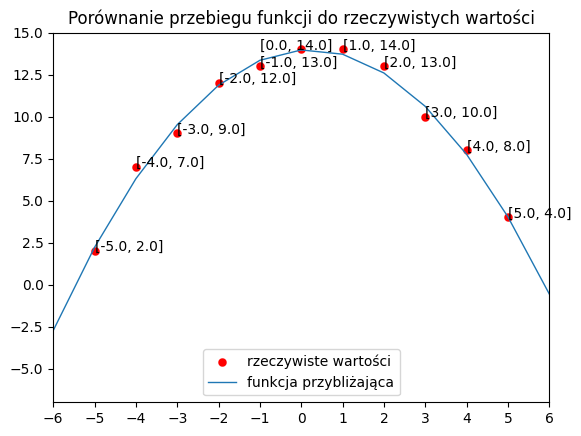

In [9]:
fig, ax = plt.subplots()

ax.scatter(A[:, 1], b, linewidths=.1, c="red", label="rzeczywiste wartości")

xPlot = np.arange(-6, 8, step=1)
yPlot = x[0] + x[1]*xPlot + x[2]*pow(xPlot, 2)
ax.plot(xPlot, yPlot, linewidth=1, label="funkcja przybliżająca")

for i in range(len(b)):
    if i == 5:
        ax.text(A[i][1]-1, b[i], s=fr"[{float(A[i][1])}, {float(b[i])}]")
    else:
        ax.text(A[i][1], b[i], s=fr"[{float(A[i][1])}, {float(b[i])}]")


ax.set(xlim=(-6, 6), xticks=np.arange(-6, 7, step=1))
plt.title("Porównanie przebiegu funkcji do rzeczywistych wartości")
plt.legend(loc="lower center")
plt.show()

Możemy zauważyć, że model funkcji rzędu drugiego bardzo dobrze dopasowuje się do podanych danych.